In [6]:
# Linear Regression in TensorFlow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [3]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [4]:
Yhat = X * w + b

loss = tf.square(Y - Yhat, name='loss')

In [5]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

Epoch 0 : 2069.6319333978354
Epoch 1 : 2117.0123581953535
Epoch 2 : 2092.302723001866
Epoch 3 : 2068.5080461938464
Epoch 4 : 2045.591184088162
Epoch 5 : 2023.5146448101316
Epoch 6 : 2002.2447619835536
Epoch 7 : 1981.748338803649
Epoch 8 : 1961.9944411260742
Epoch 9 : 1942.9520116143283
Epoch 10 : 1924.5930823644712
Epoch 11 : 1906.8898800636332
Epoch 12 : 1889.8164505837929
Epoch 13 : 1873.347133841543
Epoch 14 : 1857.4588400604468
Epoch 15 : 1842.1278742424079
Epoch 16 : 1827.332495119955
Epoch 17 : 1813.0520579712022
Epoch 18 : 1799.2660847636982
Epoch 19 : 1785.9562132299961
Epoch 20 : 1773.1024853109072
Epoch 21 : 1760.689129482884
Epoch 22 : 1748.6984157081515
Epoch 23 : 1737.1138680398553
Epoch 24 : 1725.920873066732
Epoch 25 : 1715.1046249579008
Epoch 26 : 1704.6500954309377
Epoch 27 : 1694.5447134910141
Epoch 28 : 1684.7746311347667
Epoch 29 : 1675.328450968245
Epoch 30 : 1666.1935385839038
Epoch 31 : 1657.3584002084322
Epoch 32 : 1648.8122658529207
Epoch 33 : 1640.544074254709

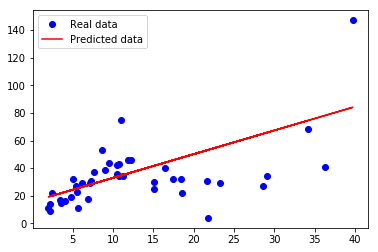

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./my_graph/03/linear_reg', sess.graph)
    
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X : x, Y : y})
            total_loss += l
        print ("Epoch {0} : {1}".format(i, total_loss/n_samples))
        
    writer.close()
    
    w_value, b_value = sess.run([w, b])
    
X, y = data.T[0], data.T[1]
plt.plot(X, y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

In [8]:
# Logistic regression for OCR
from tensorflow.examples.tutorials.mnist import input_data
import time

In [9]:
learning_rate = 0.01
batch_size = 128
n_epoch = 10

In [10]:
mnist = input_data.read_data_sets('/data/mnist', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /data/mnist\t10k-labels-idx1-ubyte.gz


In [13]:
X = tf.placeholder(tf.float32, [batch_size, 784], name='features')
Y = tf.placeholder(tf.float32, [batch_size, 10] ,name='labels')

In [15]:
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]) ,name='bias')
logits = tf.matmul(X, w) + b

In [16]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits, Y, name='loss')
loss = tf.reduce_mean(entropy)

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [18]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./my_graph/03/logistic_reg', sess.graph)
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(mnist.train.num_examples / batch_size)
    
    for i in range(n_epoch):
        total_loss = 0
        
        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            total_loss += loss_batch
        
        print("Average loss epoch {0} : {1}".format(i, total_loss/n_batches))
    print("Total time: {0} seconds".format(time.time() - start_time))
    print("Optimization Finished")
    
    # Testing the model
    n_batches = int(mnist.test.num_examples / batch_size)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y : Y_batch})
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        total_correct_preds += sess.run(accuracy)
    print("Accuracy : {0}".format(total_correct_preds / mnist.test.num_examples))
    writer.close()

Average loss epoch 0 : 1.2845190816270167
Average loss epoch 1 : 0.7332399870965864
Average loss epoch 2 : 0.6010412075719633
Average loss epoch 3 : 0.5372319666794686
Average loss epoch 4 : 0.4984478988708594
Average loss epoch 5 : 0.4717013091890962
Average loss epoch 6 : 0.4517468400907405
Average loss epoch 7 : 0.43621481680647756
Average loss epoch 8 : 0.42347004120444365
Average loss epoch 9 : 0.413405565184591
Total time: 4.618482828140259 seconds
Optimization Finished
Accuracy : 0.898


In [26]:
"""
Simple TensorFlow exercises
You should thoroughly test your code
"""
###############################################################################
# 1a: Create two random 0-d tensors x and y of any distribution.
# Create a TensorFlow object that returns x + y if x > y, and x - y otherwise.
# Hint: look up tf.cond()
# I do the first problem for you
###############################################################################
def print_var(variable, model):
    with tf.Session() as session:
        session.run(model)
        print(session.run(variable))

x = tf.random_uniform([])  # Empty array as shape creates a scalar.
y = tf.random_uniform([])
out = tf.cond(tf.less(x, y), lambda: tf.add(x, y), lambda: tf.sub(x, y))

model = tf.global_variables_initializer()

print_var(y, model)

0.630139


In [51]:
###############################################################################
# 1b: Create two 0-d tensors x and y randomly selected from -1 and 1.
# Return x + y if x < y, x - y if x > y, 0 otherwise.
# Hint: Look up tf.case().
###############################################################################

# YOUR CODE
x = tf.random_uniform([], minval=-1, maxval=1)
y = tf.random_uniform([], minval=-1, maxval=1)

out = tf.case(
              {
               tf.less   (x, y): lambda: tf.add(x, y),
               tf.greater(x, y): lambda: tf.sub(x, y)
              },
               default = lambda: tf.constant(0.0),
               exclusive=True
             )

In [58]:
###############################################################################
# 1c: Create the tensor x of the value [[0, -2, -1], [0, 1, 2]] 
# and y as a tensor of zeros with the same shape as x.
# Return a boolean tensor that yields Trues if x equals y element-wise.
# Hint: Look up tf.equal().
###############################################################################

# YOUR CODE
x = tf.constant([[0, -2, -1], [0, 1, 2]])
y = tf.zeros_like(x)

out = tf.equal(x, y)

[[ True False False]
 [ True False False]]


In [64]:
###############################################################################
# 1d: Create the tensor x of value 
# [29.05088806,  27.61298943,  31.19073486,  29.35532951,
#  30.97266006,  26.67541885,  38.08450317,  20.74983215,
#  34.94445419,  34.45999146,  29.06485367,  36.01657104,
#  27.88236427,  20.56035233,  30.20379066,  29.51215172,
#  33.71149445,  28.59134293,  36.05556488,  28.66994858].
# Get the indices of elements in x whose values are greater than 30.
# Hint: Use tf.where().
# Then extract elements whose values are greater than 30.
# Hint: Use tf.gather().
###############################################################################

# YOUR CODE
x = tf.constant([29.05088806,  27.61298943,  31.19073486,  29.35532951,
                 30.97266006,  26.67541885,  38.08450317,  20.74983215,
                 34.94445419,  34.45999146,  29.06485367,  36.01657104,
                 27.88236427,  20.56035233,  30.20379066,  29.51215172,
                 33.71149445,  28.59134293,  36.05556488,  28.66994858])

out = tf.gather(x, indices=tf.where(x > 30))

In [71]:
###############################################################################
# 1e: Create a diagnoal 2-d tensor of size 6 x 6 with the diagonal values of 1,
# 2, ..., 6
# Hint: Use tf.range() and tf.diag().
###############################################################################

# YOUR CODE
out = tf.diag(tf.range(1, 7))

In [98]:
###############################################################################
# 1f: Create a random 2-d tensor of size 10 x 10 from any distribution.
# Calculate its determinant.
# Hint: Look at tf.matrix_determinant().
###############################################################################

# YOUR CODE
x = tf.random_normal(shape=(10, 10), stddev=1, mean=0.5)
out = tf.matrix_determinant(x)

-932.514


In [97]:
###############################################################################
# 1g: Create tensor x with value [5, 2, 3, 5, 10, 6, 2, 3, 4, 2, 1, 1, 0, 9].
# Return the unique elements in x
# Hint: use tf.unique(). Keep in mind that tf.unique() returns a tuple.
###############################################################################

# YOUR CODE
x = tf.constant([5, 2, 3, 5, 10, 6, 2, 3, 4, 2, 1, 1, 0, 9])
out, idx = tf.unique(x)

[ 5  2  3 10  6  4  1  0  9]


In [118]:
###############################################################################
# 1h: Create two tensors x and y of shape 300 from any normal distribution,
# as long as they are from the same distribution.
# Use tf.less() and tf.select() to return:
# - The mean squared error of (x - y) if the average of all elements in (x - y)
#   is negative, or
# - The sum of absolute value of all elements in the tensor (x - y) otherwise.
# Hint: see the Huber loss function in the lecture slides 3.
###############################################################################

# YOUR CODE
x = tf.random_normal(shape=(300,), stddev=1, mean=0.5)
y = tf.random_normal(shape=(300,), stddev=1, mean=0.5)

residual = tf.sub(x, y)
mean = tf.div(tf.reduce_sum(residual), 300)

condition = tf.less(mean, 0)

small_res = 0.5 * tf.square(residual)
large_res = residual - 0.5

out = tf.select(condition, small_res, large_res)

In [119]:
print_var(out, model)

[ 0.84575582 -2.42943811 -0.62032926  0.64819503  2.08836842  1.38458061
 -2.98914242 -0.9232372   0.06528646 -1.38232887 -0.27166617  0.99233699
 -2.97479224 -2.51875997  2.21888709  2.60145783  1.8942008  -0.07591522
 -1.04239511 -1.48455191 -0.63246059 -0.08174157 -0.38979602 -1.406299
  1.83908319 -1.12011027 -3.13526869 -2.33659148 -2.21863031 -0.90802813
  1.02675605  1.07906985  2.35576749 -1.45940423 -1.52326393  2.06511855
  1.67965984 -2.4510026  -2.32800293 -1.34461117 -1.26925492 -1.64591682
 -0.86407715 -0.61399287 -0.76828647  0.52986586  0.06576431  1.56482267
 -0.15203208 -0.83853161 -1.5099442   0.19050175 -2.39832211  0.09064162
  0.98059952 -1.34732795 -0.74485409 -0.34591973 -1.59268761  1.37592578
  0.57619607 -1.34699678 -1.66521156 -1.90893221  2.40681648 -0.41788614
  0.63152206 -0.06358999 -1.05610383  1.65957189 -0.97401583 -1.88996649
  0.41152835 -2.59478331 -0.92580533 -0.34965014 -1.4442358  -0.60184109
 -2.20360804  0.40562117  1.19791925 -1.7887342  -1.9

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa